In [1]:
# Goal: Investigate why the late-time spectrum seems to have no high-temperature samples
import sys, os, functools
import warnings
warnings.filterwarnings("ignore", module="dynesty.sampling")
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import astropy.constants as aconst
import astropy.units as u
from dynesty import plotting as dyplot
from dynesty import utils as dyfunc
import astropy.table as table
from astropy.cosmology import Planck15 as cosmology

try:
    import snelib19odp
except ImportError:
    sys.path.append('../lib')
import snelib19odp.dataloader as dataloader
import snelib19odp.const as const
import snelib19odp.analysis.oxygen as oxygen
import snelib19odp.blackbody as blackbody
import snelib19odp.specds as specds
import snelib19odp.analysis.spec_model as spec_model

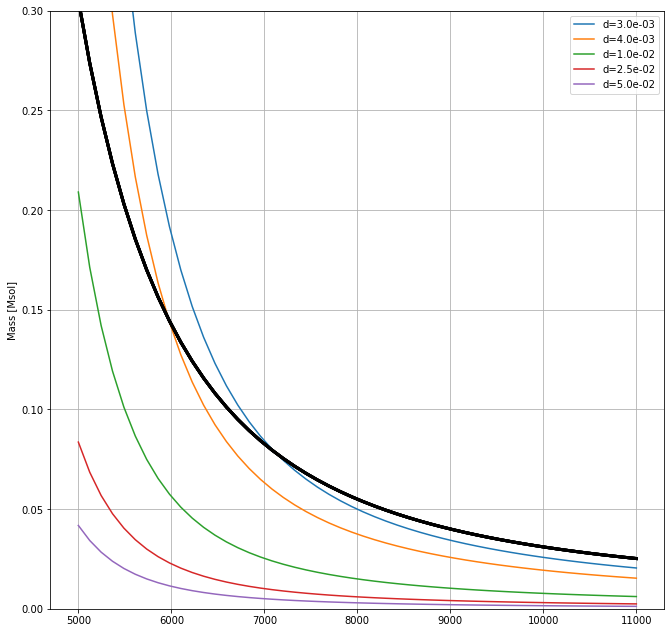

In [12]:
plt.figure(figsize=(11,11))
temp = np.linspace(1000, 11000)


temp = np.linspace(5000, 11e3)

tau = 2.0

for d in [0.003, 0.004, 0.01, 0.025, 0.05]:
    l6300 = np.empty_like(temp)
    l5577 = np.empty_like(temp)
    #for d in [0.01, 0.1, 0.5, 1.0]:
    #for d in [0.1, 0.5]:
    #d = 0.2
    for i in range(len(temp)):
        l5577[i] = oxygen.calculate_line_luminosity_5577(1.0, temp[i], tau, d)
        l6300[i] = oxygen.calculate_line_luminosity_63xx(1.0, temp[i], tau, 6300)
    plt.plot(temp, 0.03e38/l5577, label='d=%.1e' % (d, ))
    plt.plot(temp, 10e38/l6300, color='black', lw=3)
plt.legend()
plt.ylabel('Mass [Msol]')
#plt.axhline(8.5e38)
#plt.yscale('log')
plt.ylim((0, 0.3))
plt.grid()